Ex1 Use data from Danmarks Statistik - Databanken

   1. Go to https://www.dst.dk/da/Statistik/brug-statistikken/muligheder-i-statistikbanken/api#testkonsol
   2. Open 'Konsol' and click 'Start Konsol'
   3. In the console at pt 1: choose 'Retrieve tables', pt 2: choose get request and json format and pt 3: execute:
      A.  check the result
      B.  in the code below this same get request is used to get information about all available data tables in 'databanken'.
   4. Change pt. 1 in the console to 'Retrieve data', pt 2: 'get request' and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.
    5. With data aggregation and data visualization answer the following questions:
      A.  What is the change in pct of divorced danes from 2008 to 2020?
      B.  Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
      C.  Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
      D.  Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs

Ex2 Use another table (extra)

Choose any of the other tables in 'databanken' to find interesting data.

    Collect the data
    Pose 5 or more interesing questions to the data
    Answer the questions by aggregating the data
    Illustrate the answers with visual plots



In [2]:
# imports
%pylab inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# from API
FromApi = "https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=CodeAndValue&timeOrder=Ascending&delimiter=Semicolon&OMR%C3%85DE(Stub)=000&ALDER(Stub)=IALT&CIVILSTAND(Stub)=F&Tid(Stub)=*"
df = pd.read_csv(FromApi)
#from File
#df = pd.read_csv("./data/Exc5A.csv")
df.head()


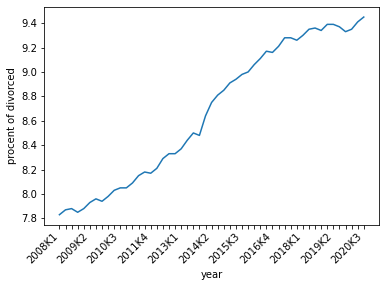

In [12]:
#5.A  What is the change in pct of divorced danes from 2008 to 2020?

# find correct data: 
Api5A = "https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=CodeAndValue&timeOrder=Ascending&delimiter=Semicolon&CIVILSTAND=F&Tid=*"
Api5A_total = "https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=CodeAndValue&delimiter=Semicolon&Tid=*&CIVILSTAND=TOT"

#Display data
df = pd.read_csv(Api5A, sep=';')
df_tot = pd.read_csv(Api5A_total, sep=';')
#print (df)
#print (df_tot)

#Format returned year sting
year_list = list(df["TID"])
years = []
for x in year_list:
    years.append(x[0:6])

#Extract data
amount_list = list(df["INDHOLD"])
total_poulation =  list(df_tot["INDHOLD"])

#Find pct of divers y / x * 100
pct_list = []
i = 0 
while i < len(df):
    pct_list.append(round(amount_list[i] / total_poulation[i] * 100, 2))
    i += 1
    
#Display data in plot
plt.plot(years,pct_list)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')
plt.xlabel("year")
plt.ylabel("procent of divorced")

#fix label
ax = plt.gca()
for index, label in enumerate(ax.axes.xaxis.get_ticklabels()):
    if index % 5 != 0:
        label.set_visible(False)


In [23]:
#5.B   Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
#area = 101,851,751,561,461
data_5b = "https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=CodeAndValue&delimiter=Semicolon&OMR%C3%85DE=101%2C851%2C751%2C561%2C461&CIVILSTAND=U"

#Display data
df = pd.read_csv(data_5b, sep=';')
#print (df)

#paring data
data_dict = {}
i = 0 
while i < len(df):
    data_dict[df.iloc[i,0]] = df.iloc[i,3]
    i += 1
#print (data_dict)
print ("City with the highest percentage of 'Never Married' in 2020: " + (max(data_dict, key=lambda key: data_dict[key])))


City with the highest percentage of 'Never Married' in 2020: 101 København


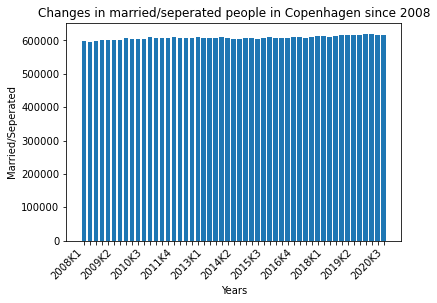

In [3]:
#5.C  Show a bar chart of changes in marrital status in Copenhagen from 2008 till now

df = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=G&Tid=*&OMR%C3%85DE=084', sep=';')
years = df.loc[:,'TID']
amount_married = df.loc[:,'INDHOLD']

plt.bar(years, amount_married)
plt.title('Changes in married/seperated people in Copenhagen since 2008')
plt.xlabel('Years')
plt.ylabel('Married/Seperated')
plt.xticks(rotation=45, horizontalalignment='right')
ax = plt.gca()
for index, label in enumerate(ax.axes.xaxis.get_ticklabels()):
    if index % 5 != 0:
        label.set_visible(False)

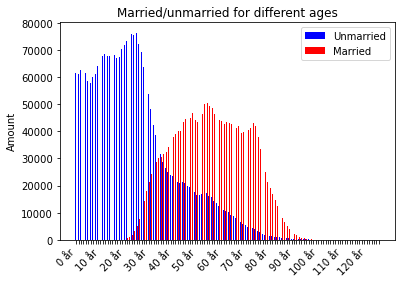

In [11]:
#5.DShow a bar chart of 'Married' and 'Never Married' for all ages in DK (Hint: 2 bars of different color)

df = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&ALDER=*&CIVILSTAND=U%2CG', sep=';')

ages = df.ALDER.unique()
ages = list(ages)
ages.pop(0)
unmarried = df.loc[df['CIVILSTAND'] == 'Ugift']['INDHOLD']
unmarried = list(unmarried)
unmarried.pop(0)
married = df.loc[df['CIVILSTAND'] == 'Gift/separeret']['INDHOLD']
married = list(married)
married.pop(0)

x = np.arange(len(ages))
width = 0.35

plt.bar(x - width/2, unmarried, color='b', width=width, label='Unmarried')
plt.bar(x + width/2, married, color='r',  width=width, label='Married')
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Amount')
plt.title('Married/unmarried for different ages')
plt.xticks(x)
plt.legend()

ax = plt.gca()

ax.set_xticklabels(ages)
for index, label in enumerate(ax.axes.xaxis.get_ticklabels()):
    if index % 10 != 0:
        label.set_visible(False)
